In [1]:
import numpy as np
import pandas as pd

In [17]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [18]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [19]:
match.shape

(756, 18)

In [20]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [87]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [88]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [89]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [90]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')


In [91]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [26]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [27]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [28]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [29]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [30]:
match_df.shape

(641, 20)

In [31]:
match_df = match_df[match_df['dl_applied'] == 0]

In [32]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [33]:
match_df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158


In [95]:
delivery_df = match_df.merge(delivery,on='match_id')

In [96]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [97]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [41]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

In [103]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [104]:
delivery_df['runs_left'] = (delivery_df['total_runs_x'] - delivery_df['current_score']).clip(lower=0)

In [105]:
if delivery_df[['over', 'ball']].isnull().any().any():
    print("Error: NaN values in over or ball")
delivery_df['balls_left'] = (120 - (delivery_df['over']*6 + delivery_df['ball'])).clip(lower=0)

In [106]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left,wickets,current_score,runs_left
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1,0,1,0,NaN,NaN,113,10,1,206
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,112,10,1,206
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,111,10,1,206
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2,0,2,0,NaN,NaN,110,10,3,204
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4,0,4,0,NaN,NaN,109,10,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,1,0,1,0,NaN,NaN,0,5,152,0
179074,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,2,0,2,0,NaN,NaN,0,5,154,0
179075,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,1,0,1,1,run out,KH Pandya,0,4,155,0
179076,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,2,0,2,0,NaN,NaN,0,4,157,0


In [107]:
if 'player_dismissed' not in delivery_df.columns:
    print("Error: player_dismissed column missing")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0).apply(lambda x: 0 if x == 0 else 1).astype(int)
delivery_df['wickets'] = 10 - delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df['wickets'] = delivery_df['wickets'].clip(lower=0)
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left,wickets,current_score,runs_left
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1,0,1,0,NaN,NaN,113,10,1,206
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,112,10,1,206
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,111,10,1,206
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2,0,2,0,NaN,NaN,110,10,3,204
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4,0,4,0,NaN,NaN,109,10,7,200


In [108]:
delivery_df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left,wickets,current_score,runs_left
179073,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,1,0,1,0,NaN,NaN,0,5,152,0
179074,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,2,0,2,0,NaN,NaN,0,5,154,0
179075,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,1,0,1,1,run out,KH Pandya,0,4,155,0
179076,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,2,0,2,0,NaN,NaN,0,4,157,0
179077,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,1,lbw,NaN,0,3,157,0


In [109]:
delivery_df['crr'] = (delivery_df['current_score']*6) / (120 - delivery_df['balls_left']).replace(0, np.nan)
delivery_df['crr'] = delivery_df['crr'].fillna(0)

In [110]:
# Calculate RRR: runs_left / overs_left
delivery_df['rrr'] = (delivery_df['runs_left']*6) / delivery_df['balls_left'].replace(0, np.nan)
delivery_df['rrr'] = delivery_df['rrr'].replace([np.inf, -np.inf], 0).fillna(0)

In [112]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [113]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [114]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left,wickets,current_score,runs_left,crr,rrr
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,1,0,NaN,NaN,113,10,1,206,0.857143,10.938053
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,0,0,NaN,NaN,112,10,1,206,0.750000,11.035714
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,0,0,NaN,NaN,111,10,1,206,0.666667,11.135135
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,2,0,NaN,NaN,110,10,3,204,1.800000,11.127273
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,4,0,NaN,NaN,109,10,7,200,3.818182,11.009174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,0,0,...,1,0,NaN,NaN,0,5,152,0,7.600000,0.000000
179074,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,0,0,...,2,0,NaN,NaN,0,5,154,0,7.700000,0.000000
179075,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,0,0,...,1,1,run out,KH Pandya,0,4,155,0,7.750000,0.000000
179076,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,0,0,...,2,0,NaN,NaN,0,4,157,0,7.850000,0.000000


In [115]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [116]:
final_df = final_df.sample(final_df.shape[0])

In [118]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
93484,Pune Warriors,Mumbai Indians,Mumbai,178,106,8,183,2.142857,10.075472,0


In [119]:
final_df.dropna(inplace=True)

In [120]:
final_df = final_df[final_df['balls_left'] != 0]

In [122]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [123]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
145363,Gujarat Lions,Kolkata Knight Riders,Kolkata,3,15,6,158,8.857143,1.200000
157483,Delhi Daredevils,Chennai Super Kings,Pune,211,106,10,218,3.000000,11.943396
136998,Gujarat Lions,Kings XI Punjab,Chandigarh,27,24,6,161,8.375000,6.750000
155370,Rajasthan Royals,Mumbai Indians,Jaipur,52,25,7,172,7.578947,12.480000
17055,Kings XI Punjab,Delhi Daredevils,Chandigarh,123,86,8,158,6.176471,8.581395
...,...,...,...,...,...,...,...,...,...
2293,Mumbai Indians,Sunrisers Hyderabad,Mumbai,84,62,8,158,7.655172,8.129032
62063,Pune Warriors,Chennai Super Kings,Chennai,35,5,5,142,5.582609,42.000000
64674,Kings XI Punjab,Mumbai Indians,Mumbai,93,53,9,159,5.910448,10.528302
19947,Deccan Chargers,Chennai Super Kings,Chennai,96,79,9,144,7.024390,7.291139


In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define ColumnTransformer with force_int_remainder_cols=False
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough', force_int_remainder_cols=False)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [146]:
# Define Pipeline
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver='liblinear'))
])

In [147]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [148]:
y_pred = pipe.predict(X_test)

In [149]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8117276472013569

In [150]:
pipe.predict_proba(X_test)[14]

array([0.99855304, 0.00144696])

In [151]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [168]:
def match_progression(x_df, match_id, pipe):
    # Filter match and end-of-over balls
    match = x_df[x_df['match_id'] == match_id]
    match = match[match['ball'] == 6]

    # Select columns and drop NaN
    cols = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']
    temp_df = match[cols].dropna()

    # Skip if no balls left
    temp_df = temp_df[temp_df['balls_left'] != 0]

    # Check if data exists
    if temp_df.empty:
        print(f"No valid data for match_id {match_id}")
        return pd.DataFrame(), 0

    # Predict probabilities
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Calculate target and runs per over
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    # Calculate wickets per over
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target

In [169]:

temp_df,target = match_progression(delivery_df,74,pipe)
temp_df


Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
17279,1,4,0,50.2,49.8
17287,2,8,0,45.8,54.2
17293,3,1,0,52.2,47.8
17299,4,7,1,64.8,35.2
17305,5,12,0,53.8,46.2
17311,6,13,0,40.7,59.3
17317,7,9,0,34.5,65.5
17325,8,15,0,21.2,78.8
17331,9,7,0,19.1,80.9
17338,10,17,0,9.5,90.5


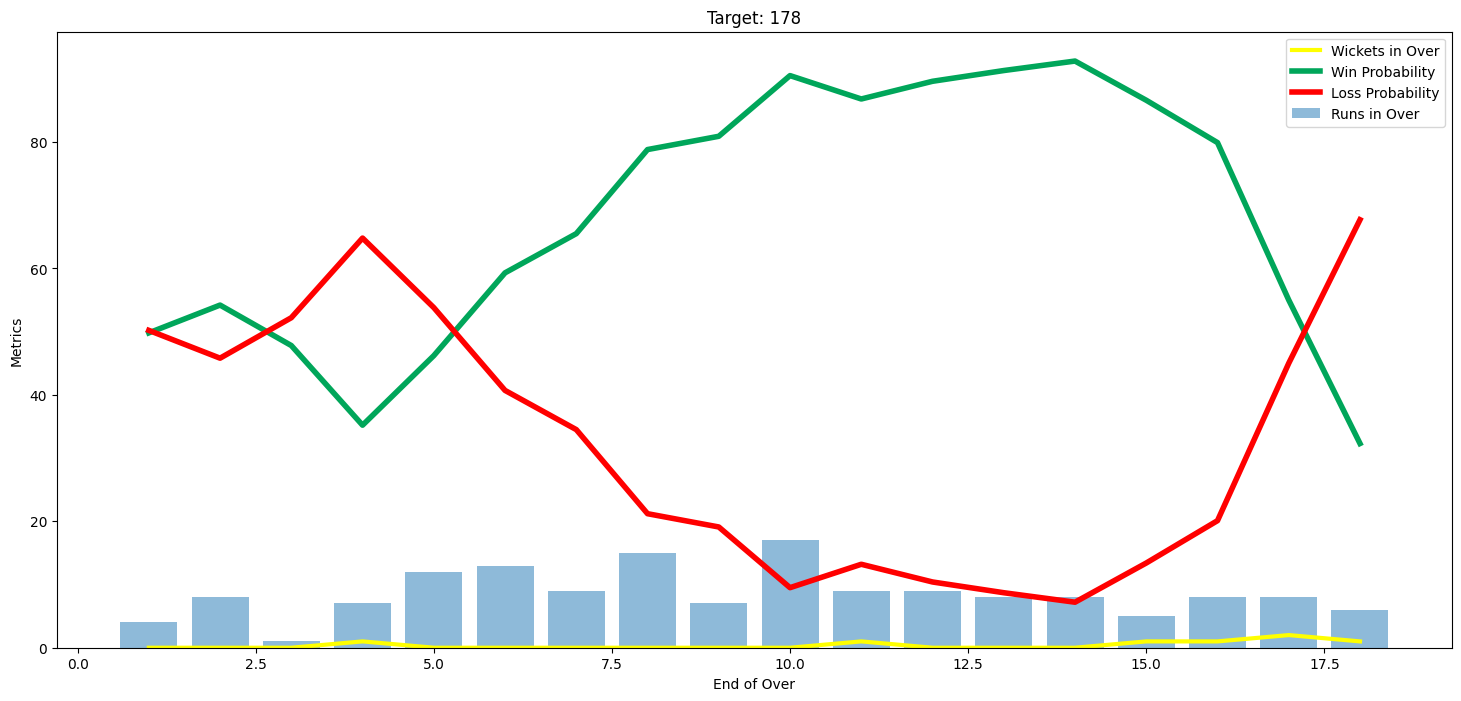

In [170]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(18, 8))

# Plot lines with labels for legend
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='yellow', linewidth=3, label='Wickets in Over')
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4, label='Win Probability')
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4, label='Loss Probability')

# Plot bars with label
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], alpha=0.5, label='Runs in Over')

# Add title
plt.title('Target: ' + str(target))

# Add legend
plt.legend()

# Add axis labels for clarity
plt.xlabel('End of Over')
plt.ylabel('Metrics')

# Display plot
plt.show()

In [171]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [172]:
delivery_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [173]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))